# Step 1: Data Collection

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Soil Temperature data in mtalbert
st = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbertSoilTempContinuous@648717-20241026100525.csv', index_col='Timestamp (UTC+12:00)', parse_dates=True)
st.head(5)

# smheadtail = (np.r_[0:5, -5:0])
stheadtail = st.iloc[np.r_[0:5, -5:0]]
print(stheadtail)

                       SoilTemp(c)
Timestamp (UTC+12:00)             
2015-10-21 10:30:00         15.000
2015-10-21 10:45:00         15.100
2015-10-21 11:00:00         15.100
2015-10-21 11:15:00         15.100
2015-10-21 11:30:00         15.100
2024-10-26 21:00:00         18.373
2024-10-26 21:15:00         18.376
2024-10-26 21:30:00         18.380
2024-10-26 21:45:00         18.384
2024-10-26 22:00:00         18.380


In [3]:
# Rainfall data in mtalbert
rain = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbertRainfallContinuous@648717-20241026100512.csv', index_col='Timestamp (UTC+12:00)', parse_dates=True)
rain.head(5)

# smheadtail = (np.r_[0:5, -5:0])
rainheadtail = rain.iloc[np.r_[0:5, -5:0]]
print(rainheadtail)

                       Rain(mm)
Timestamp (UTC+12:00)          
2004-01-06 02:24:00        0.00
2004-01-07 06:18:00        0.00
2004-01-07 06:57:00        0.52
2004-01-07 07:28:00        0.51
2004-01-07 07:32:00        0.00
2024-10-21 19:00:00        0.00
2024-10-21 19:15:00        0.00
2024-10-21 19:30:00        0.00
2024-10-21 19:45:00        0.00
2024-10-21 20:00:00        0.00


In [4]:
mtalbert_monthly_mean = rain.resample('M').mean()
print(mtalbert_monthly_mean)

                       Rain(mm)
Timestamp (UTC+12:00)          
2004-01-31             0.385146
2004-02-29             0.436604
2004-03-31             0.246667
2004-04-30             0.327965
2004-05-31             0.450168
...                         ...
2024-06-30             0.070188
2024-07-31             0.044817
2024-08-31             0.030314
2024-09-30             0.041594
2024-10-31             0.039088

[250 rows x 1 columns]


C:\Users\Ying\AppData\Local\Temp\ipykernel_9732\2823103313.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mtalbert_monthly_mean = rain.resample('M').mean()


In [5]:
# Soil Moisture data in mtalbert
sm = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbertSoilMoistureContinuous@648717-20241026100519.csv', index_col='Timestamp (UTC+12:00)', parse_dates=True)
sm.head(5)

# smheadtail = (np.r_[0:5, -5:0])
smheadtail = sm.iloc[np.r_[0:5, -5:0]]
print(smheadtail)

                       SoilMoisture(%)
Timestamp (UTC+12:00)                 
2018-07-07 11:15:00             37.364
2018-07-07 11:30:00             37.594
2018-07-07 11:45:00             37.590
2018-07-07 12:00:00             37.587
2018-07-07 12:15:00             37.584
2024-10-26 21:00:00             48.256
2024-10-26 21:15:00             48.301
2024-10-26 21:30:00             48.258
2024-10-26 21:45:00             48.091
2024-10-26 22:00:00             48.005


In [6]:
mtalbert_monthly_mean = sm.resample('M').mean()
print(mtalbert_monthly_mean)

                       SoilMoisture(%)
Timestamp (UTC+12:00)                 
2018-07-31                   40.735383
2018-08-31                         NaN
2018-09-30                         NaN
2018-10-31                         NaN
2018-11-30                         NaN
...                                ...
2024-06-30                   47.276833
2024-07-31                   48.737997
2024-08-31                   48.964037
2024-09-30                   49.487044
2024-10-31                   48.254372

[76 rows x 1 columns]


C:\Users\Ying\AppData\Local\Temp\ipykernel_9732\1258324281.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mtalbert_monthly_mean = sm.resample('M').mean()


In [7]:
nan_rows = mtalbert_monthly_mean[mtalbert_monthly_mean.isna().any(axis=1)]
print(nan_rows)

                       SoilMoisture(%)
Timestamp (UTC+12:00)                 
2018-08-31                         NaN
2018-09-30                         NaN
2018-10-31                         NaN
2018-11-30                         NaN
2018-12-31                         NaN
2019-01-31                         NaN
2019-02-28                         NaN
2019-03-31                         NaN
2019-04-30                         NaN


Data Description

In [8]:
# Display info to check datatype
print("Mt Albert Rainfall Data Info:")
rain.info()
print("\nMt Albert Soil Moisture Data Info:")
sm.info()
print("\nMt Albert Soil Temperature Data Info:")
st.info()

Mt Albert Rainfall Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210873 entries, 2004-01-06 02:24:00 to 2024-10-21 20:00:00
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Rain(mm)  210873 non-null  float64
dtypes: float64(1)
memory usage: 3.2 MB

Mt Albert Soil Moisture Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188099 entries, 2018-07-07 11:15:00 to 2024-10-26 22:00:00
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SoilMoisture(%)  188099 non-null  float64
dtypes: float64(1)
memory usage: 2.9 MB

Mt Albert Soil Temperature Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315600 entries, 2015-10-21 10:30:00 to 2024-10-26 22:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SoilTemp(c)  315600 non-null  f

In [9]:
# Overview of data
print("Mt Albert Rainfall Data statistics :")
rain.describe()


Mt Albert Rainfall Data statistics :


,Rain(mm)
count,210873.000000
mean,0.227062
std,0.799602
min,0.000000
25%,0.000000
50%,0.000000
75%,0.490000
max,14.000000


In [10]:
print("\nMt Albert  Soil Moisture Data statistics :")
sm.describe()



Mt Albert  Soil Moisture Data statistics :


,SoilMoisture(%)
count,188099.000000
mean,43.453771
std,5.151615
min,34.323000
25%,38.492000
50%,44.252000
75%,47.571000
max,53.250000


In [11]:
print("\nMt Albert Soil Temperature Data statistics :")
st.describe()


Mt Albert Soil Temperature Data statistics :


,SoilTemp(c)
count,315600.000000
mean,17.306333
std,3.648079
min,9.400000
25%,14.100000
50%,17.300000
75%,20.500000
max,26.800000


# Step 2: Handle Missing Values

Data Cleaning


In [12]:
# Display missing value
print("'Missing Value in Soil Moisture Data")
sm.isna().sum()
print(sm[sm['SoilMoisture(%)'].isnull()])

'Missing Value in Soil Moisture Data
Empty DataFrame
Columns: [SoilMoisture(%)]
Index: []


In [13]:
# Display missing value

print("Missing Value in Soil Temperature Data")
st.isna().sum()

print(st[st['SoilTemp(c)'].isnull()])

Missing Value in Soil Temperature Data
Empty DataFrame
Columns: [SoilTemp(c)]
Index: []


In [14]:
# Display missing value
print("Missing Value in Rainfall Data")
rain.isna().sum()
print(rain[rain['Rain(mm)'].isnull()])

Missing Value in Rainfall Data
Empty DataFrame
Columns: [Rain(mm)]
Index: []


In [15]:
mean_rain = rain['Rain(mm)'].mean()
std_rain = rain['Rain(mm)'].std()

# Define thresholds for outliers
lower_threshold = mean_rain - 2 * std_rain
upper_threshold = mean_rain + 2 * std_rain

# Find rows with unusual values
troubling_rows = rain[(rain['Rain(mm)'] < lower_threshold) | (rain['Rain(mm)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

                       Rain(mm)
Timestamp (UTC+12:00)          
2021-12-01 09:08:00       14.00
2022-07-20 11:16:00        6.50
2022-07-20 11:16:00        6.50
2022-07-20 11:16:00        6.50
2022-07-20 11:16:00        6.50
...                         ...
2023-04-22 12:00:00        4.52
2023-04-30 18:00:00        4.51
2023-05-01 00:00:00        4.17
2023-05-01 06:00:00       10.22
2023-05-01 12:00:00        6.52

[3100 rows x 1 columns]


In [16]:
# soil moisture and soil temperature using linear to fill data
sm.interpolate(method='linear', inplace=True)
st.interpolate(method='linear', inplace=True)

# rain fill with 0
rain.fillna(0, inplace=True)


In [17]:
# double check missing value

# sm.isna().sum()
# st.isna().sum()
# rain.isna().sum()


# Step 3: Resample Data to 15 minutes interval

<Axes: xlabel='Timestamp (UTC+12:00)'>

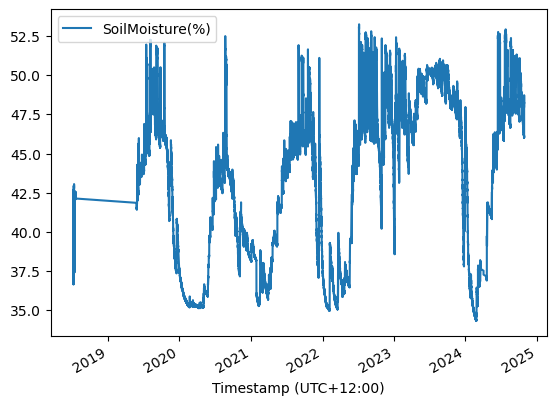

In [18]:
sm.plot()

In [19]:
mean_moisture = sm['SoilMoisture(%)'].mean()
std_moisture = sm['SoilMoisture(%)'].std()

# Define thresholds for outliers
lower_threshold = mean_moisture - 2 * std_moisture
upper_threshold = mean_moisture + 2 * std_moisture

# Find rows with unusual values
troubling_rows = sm[(sm['SoilMoisture(%)'] < lower_threshold) | 
                          (sm['SoilMoisture(%)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

Empty DataFrame
Columns: [SoilMoisture(%)]
Index: []


<Axes: xlabel='Timestamp (UTC+12:00)'>

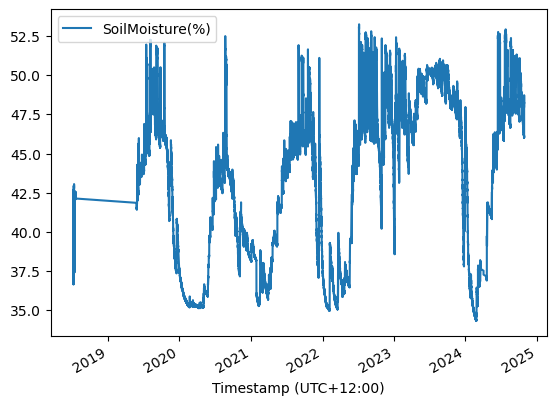

In [20]:
sm.plot()

In [21]:
mean_soiltemp = st['SoilTemp(c)'].mean()
std_soiltemp = st['SoilTemp(c)'].std()

# Define thresholds for outliers
lower_threshold = mean_soiltemp - 2 * std_soiltemp
upper_threshold = mean_soiltemp + 2 * std_soiltemp

# Find rows with unusual values
troubling_rows = st[(st['SoilTemp(c)'] < lower_threshold) | 
                          (st['SoilTemp(c)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

                       SoilTemp(c)
Timestamp (UTC+12:00)             
2015-12-27 15:30:00           24.7
2015-12-27 15:45:00           24.8
2015-12-27 16:00:00           24.9
2015-12-27 16:15:00           25.0
2015-12-27 16:30:00           25.0
...                            ...
2024-01-23 18:45:00           24.7
2024-01-23 19:00:00           24.7
2024-01-23 19:15:00           24.7
2024-01-23 19:30:00           24.7
2024-01-23 19:45:00           24.7

[1469 rows x 1 columns]


<Axes: xlabel='Timestamp (UTC+12:00)'>

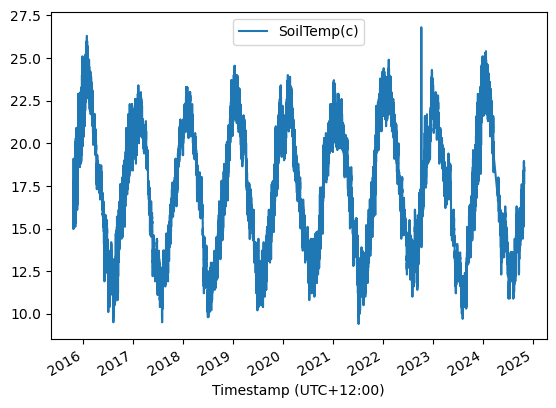

In [22]:
st.plot()

In [23]:
mean_rain = rain['Rain(mm)'].mean()
std_rain = rain['Rain(mm)'].std()

# Define thresholds for outliers
lower_threshold = mean_rain - 2 * std_rain
upper_threshold = mean_rain + 2 * std_rain

# Find rows with unusual values
troubling_rows = rain[(rain['Rain(mm)'] < lower_threshold) | (rain['Rain(mm)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

                       Rain(mm)
Timestamp (UTC+12:00)          
2021-12-01 09:08:00       14.00
2022-07-20 11:16:00        6.50
2022-07-20 11:16:00        6.50
2022-07-20 11:16:00        6.50
2022-07-20 11:16:00        6.50
...                         ...
2023-04-22 12:00:00        4.52
2023-04-30 18:00:00        4.51
2023-05-01 00:00:00        4.17
2023-05-01 06:00:00       10.22
2023-05-01 12:00:00        6.52

[3100 rows x 1 columns]


<Axes: xlabel='Timestamp (UTC+12:00)'>

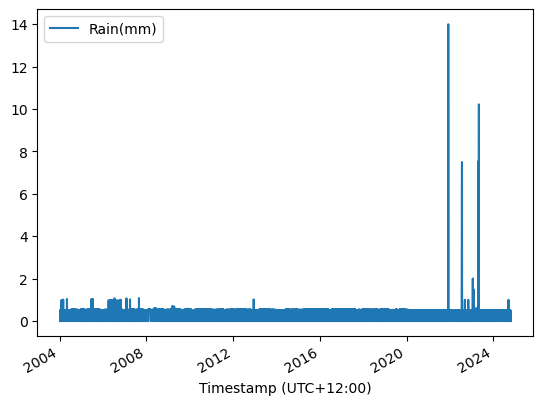

In [24]:
rain.plot()

In [25]:
# Check for mismatched timestamps before resampling
print(sm.index.min(), sm.index.max())
print(st.index.min(), st.index.max())
print(rain.index.min(), rain.index.max())

2018-07-07 11:15:00 2024-10-26 22:00:00
2015-10-21 10:30:00 2024-10-26 22:00:00
2004-01-06 02:24:00 2024-10-21 20:00:00


In [26]:
# soil_moisture_30min = sm.resample('30T').mean()
soil_moisture_15mins = sm.resample('15T').mean()

soil_temp_15mins = st.resample('15T').mean()
rainfall_15mins = rain.resample('15T').sum()


C:\Users\Ying\AppData\Local\Temp\ipykernel_9732\3335301185.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  soil_moisture_15mins = sm.resample('15T').mean()
C:\Users\Ying\AppData\Local\Temp\ipykernel_9732\3335301185.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  soil_temp_15mins = st.resample('15T').mean()
C:\Users\Ying\AppData\Local\Temp\ipykernel_9732\3335301185.py:5: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rainfall_15mins = rain.resample('15T').sum()


### Data overtime

<Axes: xlabel='Timestamp (UTC+12:00)'>

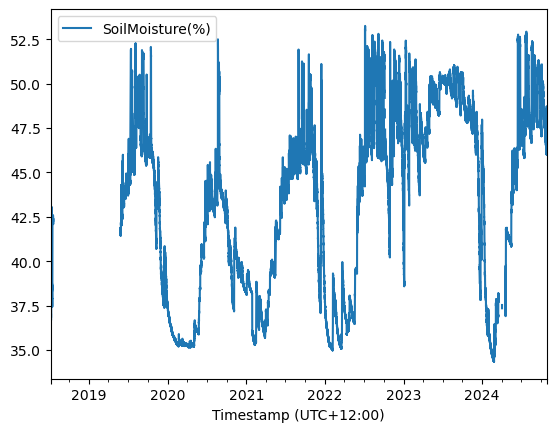

In [27]:
soil_moisture_15mins.plot()

# Step 4: Combine Data

In [28]:
# Determine the latest common start date
latest_start_date = max(rainfall_15mins.index.min(), soil_moisture_15mins.index.min(), soil_temp_15mins.index.min())
end_date = min(rainfall_15mins.index.max(), soil_moisture_15mins.index.max(), soil_temp_15mins.index.max())


In [29]:
# Filter datasets to the common time range
soil_moisture_15mins = soil_moisture_15mins[latest_start_date:end_date]
soil_temp_15mins = soil_temp_15mins[latest_start_date:end_date]
rainfall_15mins = rainfall_15mins[latest_start_date:end_date]


In [30]:
# Merge datasets on the timestamp
mtalbert_data_15mins = rainfall_15mins.join(soil_temp_15mins, how='inner', rsuffix='_rain')
mtalbert_data_15mins = mtalbert_data_15mins.join(soil_moisture_15mins, how='inner', rsuffix='_soil_moisture')
mtalbert_data_15mins.dropna(inplace=True)  # Drop any rows with missing values after merging


In [31]:
mtalbert_data_15mins.head()

,Rain(mm),SoilTemp(c),SoilMoisture(%)
Timestamp (UTC+12:00),,,
2018-07-07 11:15:00,0.0,10.4,37.364
2018-07-07 11:30:00,0.0,10.4,37.594
2018-07-07 11:45:00,0.0,10.4,37.590
2018-07-07 12:00:00,0.0,10.5,37.587
2018-07-07 12:15:00,0.0,10.5,37.584


In [32]:
# Save the combined data to a new CSV file
mtalbert_data_15mins.to_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv')
print("Combined data (15-minute intervals) saved successfully.")

Combined data (15-minute intervals) saved successfully.


In [33]:
# mtalbert = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
# mtalbert.head()

In [34]:
# mtalbert['Location'] = 'Central Auckland'
# mtalbert['Land position'] = 'Flat ridge'
# mtalbert['Slope(degree)'] = '0-3'
# mtalbert['Soil Order'] = 'Ultic'
# mtalbert['Soil Types / Series'] = 'Whareora sandy clay loam'
# mtalbert['NZ Soil Classification'] = 'Mottled Yellow Ultic'
# mtalbert['Soil Profile Description'] = '0-10cm dark grey sandy clay loam, structure crumbly when wet, likely to be granular when dry; 10-15cm dark grey sandy clay loam, mixing with yellow brown sandy clay; 15-40 yellow brown sandy clay with grey mottles, structure massive with sticky consistence when wet, likely to be nutty of blocky when dry'
# mtalbert['Pastoral land use'] = 'Mixed dairy and drystock'
# mtalbert.head()
# mtalbert.to_csv('../Data/soil data/mtalbert_soil_data.csv')

Data Transformation


Feature Engineering: Scaling, Normalization and Standardization


Feature Selection


Handling Imbalanced Data


Encoding Categorical Features


Data Splitting